# One to Many visualization code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap as umap
import os

In [166]:
def read_data_xy(folder):
    # Import data_x/y
    if 'Yang' in folder:
        data_x = pd.read_csv(os.path.join(folder, 'data_x.csv'),header=None,sep=' ').values
        data_y = pd.read_csv(os.path.join(folder, 'data_y.csv'),header=None,sep=' ').values
    else:
        data_x = pd.read_csv(os.path.join(folder, 'data_x.csv'),header=None).values
        data_y = pd.read_csv(os.path.join(folder, 'data_y.csv'),header=None).values
        
    print(np.shape(data_x))
    print(np.shape(data_y))
    return data_x, data_y

def read_data_from_name(dataset_name):
    if dataset_name == 'Yang':
        return read_data_xy('/home/sr365/MM_Bench/Data/Yang_sim/dataIn/')
    elif dataset_name == 'Chen':
        return read_data_xy('/home/sr365/MM_Bench/Data/Chen/prev_dataset')
    elif dataset_name == 'Peurifoy':
        return read_data_xy('/home/sr365/MM_Bench/Data/Peurifoy')
    else:
        print('you have the wrong dataset_name')
dataset_name = 'Chen'#'Peurifoy'#'Yang'# ###  # # # # # #
data_x, data_y = read_data_from_name(dataset_name)

(50000, 5)
(50000, 256)


In [167]:
def get_MSE_list(data_y, target):
    return np.mean(np.square(data_y - target), axis=1)

def get_top_k_MSE(MSE_list, k):
    sorted_index = np.argsort(MSE_list)
    return MSE_list[sorted_index[:k]], sorted_index[:k], sorted_index # Returns the top k smallest mse value and the index of them

def draw_bunch_of_spectra(spectra, gt, save_name=None):
    f = plt.figure()
    for i in range(len(spectra)):
        plt.plot(spectra[i, :],label='{}-th'.format(i+1), c='grey', alpha=0.5)
    #plt.plot(spectra)
    plt.plot(gt, c='r', linewidth=3, label='gt')
    #plt.legend()
    plt.xlabel('frequency')
    plt.ylabel('Transmission')
    if save_name is not None:
        plt.savefig(save_name)

def histogram_MSE(MSE_list, bins=50, log=True, eps=1e-2, x_low=None, x_high=None):
    f = plt.figure()
   
    if log:
        plt.hist(np.log10(MSE_list + eps), bins=bins) 
        plt.xlabel('log MSE')
    else:
        plt.hist(MSE_list, bins=bins)
        plt.xlabel('MSE')
    #plt.xscale('log')
    if x_low is not None:
        plt.xlim([x_low, x_high])
    plt.ylabel('count')

    #index_list = np.arange(len(MSE_list))
    #twin_array = np.concatenate([index_list, MSE_list], axis=1)
    #print(np.shape(twin_array))

def mean_ucledian_distance(x, x_target):
    return np.mean(np.square(x - x_target), axis=1)

def mean_pairwise_distance(x):
    """
    Returns the mean pw distance and the mean closest point distance
    """
    from sklearn.metrics import pairwise_distances 
    pair_dist = pairwise_distances(x)
    l = len(x)  # Number of samples
    mean_dist = np.sum(pair_dist)/ (l*l - l)

    # Get the mean of closest point
    pair_dist_sort = np.sort(pair_dist)
    assert np.sum(pair_dist_sort[:, 0]) == 0, 'the sum of first column should be 0 in the sorted array'
    
    return mean_dist, np.mean(pair_dist_sort[:, 1])

#def axis_info(dataset_name):
#    if dataset_name == 'Peurifoy':
#        plt.xlabel('')

#plt.plot(data_x[0, :])
#print(np.shape(get_MSE_list(data_y, data_y[0, :])))
def plt_mse_and_spectra(index, k, plot_worst=False, save_name=None, plot=True):
    MSE_list = get_MSE_list(data_y, data_y[index, :])
    MSE_smallest, index_MSE_smallest, sorted_index = get_top_k_MSE(MSE_list, k)
    if not plot:
        return MSE_list, MSE_smallest, index_MSE_smallest, sorted_index 
    # Do the plotting things here
    histogram_MSE(MSE_list)#, x_low=-5, x_high=-2.5)
    print(np.mean(MSE_smallest))
    if plot_worst:
        draw_bunch_of_spectra(data_y[sorted_index[-k:], :], data_y[index, :], save_name=save_name)
    else:
        draw_bunch_of_spectra(data_y[index_MSE_smallest, :], data_y[index, :],save_name=save_name )
    return MSE_list, MSE_smallest, index_MSE_smallest, sorted_index
#print(MSE_smallest_20)
#draw_bunch_of_spectra(data_y[index_MSE_smallest_20, :], data_y[0, :] )


5.186255676455528e-06
5.186255676455528e-06


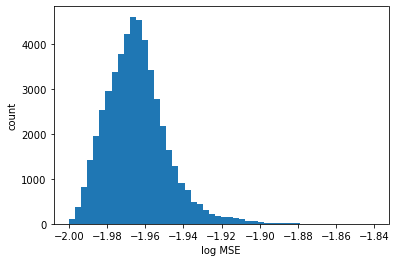

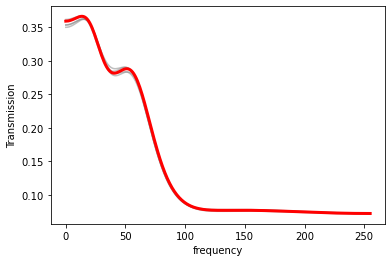

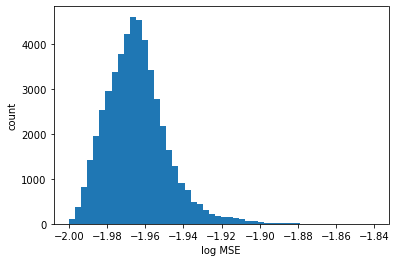

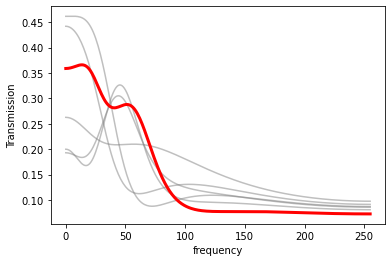

In [168]:
index, k = 0, 5
MSE_list, MSE_smallest, index_MSE_smallest, sorted_index = plt_mse_and_spectra(index, k, save_name='/home/sr365/MM_Bench/Data/one_to_many/plots/spectra_{}_ind_{}_k_{}.png'.format(dataset_name, index, k))
MSE_list, MSE_smallest, index_MSE_smallest, sorted_index = plt_mse_and_spectra(index, k, plot_worst=True)

In [169]:
embedding = umap.UMAP().fit_transform(data_x)

In [170]:
#mapper = umap.UMAP().fit(data_x)

In [171]:
sub_sample = 10000
population_pw_avg, min_dist_within_cluster = mean_pairwise_distance(data_x[:sub_sample, :])
print('mean pairwise_distance for whole dataset:', population_pw_avg)
print('cloestest pairwise_distance for whole dataset:', min_dist_within_cluster)


mean pairwise_distance for whole dataset: 39.65227496176187
cloestest pairwise_distance for whole dataset: 4.950562318730797


[5.218218797167063, 7.03610197652213, 7.724220547869602, 10.08329100867331, 8.975302496705002, 7.312670731412098, 13.51701776466578, 13.275444609456514, 12.749396831789515, 10.10979944311213]
ratio of mean pw cluster geometry distance with population average 0.24210833880263072
ratio of mean pw cluster geometry distance with population min 1.9392032263515786


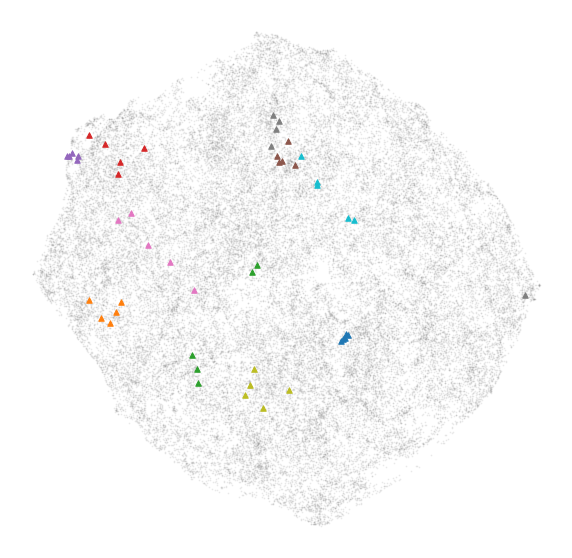

In [172]:
f = plt.figure(figsize=[10,10])
#show_k = 20
cluster_num = 10
MSE_list[MSE_list == 0] = np.mean(MSE_list)     # Get rid of the 0 point for the log scale and make it average (Given it would be plot in the other function)
#plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(MSE_list), s=1,cmap='jet', alpha=0.2)
plt.scatter(embedding[:, 0], embedding[:, 1], c='grey', s=1, alpha=0.1)#
#plt.colorbar()
scatter_axis = plt.gca()
#plt.scatter(embedding[sorted_index[:show_k], 0], embedding[sorted_index[:show_k], 1], c=np.log10(MSE_list[sorted_index[:show_k]]),s=30,cmap='jet', alpha=1, label='top_{}'.format(show_k))
pw_dist_list = []   # Initialize the pairwise distance list
for index in range(cluster_num):
    k = 5
    MSE_list, MSE_smallest, index_MSE_smallest, sorted_index = plt_mse_and_spectra(index, k, plot=False)
    scatter_axis.scatter(embedding[index_MSE_smallest, 0], embedding[index_MSE_smallest, 1], marker='^', s=30, label='S_cluster_{}'.format(index))
    # Print the geometry space distance
    pw_distance_within_cluster, min_dis_within_cluster =  mean_pairwise_distance(data_x[index_MSE_smallest, :])
    #print('mean pw distance for this cluster: ', pw_distance_within_cluster)
    pw_dist_list.append(pw_distance_within_cluster)
print(pw_dist_list)
print('ratio of mean pw cluster geometry distance with population average', np.mean(pw_dist_list)/population_pw_avg)
print('ratio of mean pw cluster geometry distance with population min', np.mean(pw_dist_list)/min_dist_within_cluster)
#plt.scatter(embedding[index, 0], embedding[index, 1],c='r', s=100,marker='*',label='gt')
#scatter_axis.legend()
plt.axis('off')
plt.savefig('/home/sr365/MM_Bench/Data/one_to_many/plots/geometry_{}_cluster_{}_k_{}.png'.format(dataset_name, cluster_num, k))


## Make sure the correlation between the distance in the original geometry space and the umapped space

In [79]:
point_index_target = np.random.randint(0, high=len(data_x))
distance_in_ori_geo_space = mean_ucledian_distance(data_x, data_x[point_index_target, :])
distance_in_umap_space = mean_ucledian_distance(embedding, embedding[point_index_target, :])

print(np.shape(distance_in_ori_geo_space), np.shape(distance_in_umap_space))

(50000,) (50000,)


In [80]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(distance_in_ori_geo_space, distance_in_umap_space)

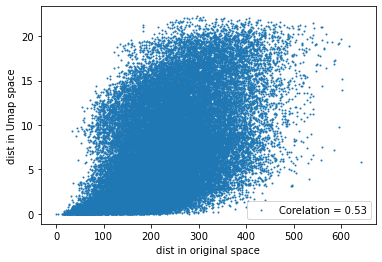

In [81]:
f = plt.figure()
plt.scatter(distance_in_ori_geo_space, distance_in_umap_space, s=1, label='Corelation = {:.2f}'.format(r_value))
plt.legend()
plt.xlabel('dist in original space')
plt.ylabel('dist in Umap space')
plt.savefig('/home/sr365/MM_Bench/Data/one_to_many/plots/umap_correlation_{}.png'.format(dataset_name))

In [31]:
print(np.corrcoef(distance_in_ori_geo_space, distance_in_umap_space))

[[1.        0.6885947]
 [0.6885947 1.       ]]


In [33]:
print('r_val = {}, p_val = {}'.format(r_value, p_value))

r_val = 0.6885946977468395, p_val = 0.0
